# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Data import

In [5]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [6]:
df_verseny_public_train

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
0,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,8,57,0,0,15,43,0,...,0,0,0,0,0,0,0,0,0,0
2,100002,0,0,0,0,8,50,8,50,0,...,0,0,0,0,0,0,0,0,0,0
3,100003,15,15,8,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,0,8,15,0,0,15,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,0,0,0,0,127,1,8,1,22,...,0,0,0,0,0,0,0,0,0,0
99996,199996,50,8,0,0,57,1,50,8,50,...,0,0,0,0,0,0,0,0,0,0
99997,199997,15,127,0,0,22,1,71,120,8,...,0,0,0,0,0,0,0,0,0,0
99998,199998,8,8,0,0,43,1,8,64,8,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_verseny_public_train.describe()

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.000000
mean,149999.500000,8.798000,16.085980,1.066320,7.923940,19.105870,8.563590,15.600520,23.712400,4.927330,...,0.002190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015000
std,28867.657797,23.308133,48.515646,5.824816,50.279646,42.710725,40.371399,31.981042,54.356458,17.719046,...,0.501804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121553
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,124999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,174999.250000,8.000000,8.000000,0.000000,0.000000,22.000000,1.000000,15.000000,22.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,199999.000000,477.000000,1548.000000,610.000000,1576.000000,631.000000,1506.000000,603.000000,1632.000000,512.000000,...,134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [8]:
df_verseny_public_train.columns

Index(['cookie_id', 'Topic1_ic', 'Topic1_ec', 'Topic2_ic', 'Topic2_ec',
       'Topic3_ic', 'Topic3_ec', 'Topic4_ic', 'Topic4_ec', 'Topic5_ic',
       ...
       'Topic177_ec', 'Topic178_ic', 'Topic178_ec', 'Topic179_ic',
       'Topic179_ec', 'Topic180_ic', 'Topic180_ec', 'Topic181_ic',
       'Topic181_ec', 'target'],
      dtype='object', length=258)

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.038284)
2. Feature 17 (0.030721)
3. Feature 7 (0.029157)
4. Feature 82 (0.027768)
5. Feature 68 (0.025888)
6. Feature 83 (0.022752)
7. Feature 66 (0.021094)
8. Feature 6 (0.021023)
9. Feature 70 (0.020914)
10. Feature 61 (0.020141)
11. Feature 29 (0.020021)
12. Feature 16 (0.018154)
13. Feature 28 (0.017602)
14. Feature 63 (0.016506)
15. Feature 20 (0.016239)
16. Feature 19 (0.016166)
17. Feature 71 (0.015427)
18. Feature 21 (0.015250)
19. Feature 11 (0.014363)
20. Feature 69 (0.013388)
21. Feature 18 (0.013383)
22. Feature 67 (0.012360)
23. Feature 105 (0.011844)
24. Feature 0 (0.011606)
25. Feature 9 (0.011578)
26. Feature 12 (0.011553)
27. Feature 135 (0.010847)
28. Feature 22 (0.010743)
29. Feature 131 (0.010603)
30. Feature 15 (0.010208)
31. Feature 4 (0.009787)
32. Feature 56 (0.009713)
33. Feature 87 (0.009631)
34. Feature 35 (0.009584)
35. Feature 5 (0.009542)
36. Feature 14 (0.009528)
37. Feature 174 (0.009038)
38. Feature 175 (0.009035)
39. F

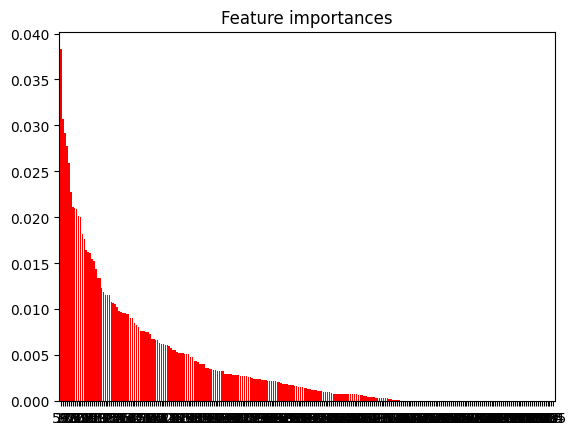

In [10]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.024843)
2. Feature 68 (0.023364)
3. Feature 17 (0.023140)
4. Feature 21 (0.021945)
5. Feature 19 (0.021883)
6. Feature 82 (0.021618)
7. Feature 6 (0.021380)
8. Feature 18 (0.021078)
9. Feature 59 (0.020952)
10. Feature 83 (0.020654)
11. Feature 16 (0.020496)
12. Feature 71 (0.020231)
13. Feature 20 (0.020175)
14. Feature 70 (0.019554)
15. Feature 4 (0.017112)
16. Feature 69 (0.016709)
17. Feature 66 (0.016691)
18. Feature 67 (0.016511)
19. Feature 61 (0.015963)
20. Feature 29 (0.014155)
21. Feature 28 (0.014137)
22. Feature 35 (0.012016)
23. Feature 22 (0.011697)
24. Feature 87 (0.011347)
25. Feature 12 (0.011290)
26. Feature 1 (0.011261)
27. Feature 57 (0.010790)
28. Feature 14 (0.010762)
29. Feature 105 (0.010334)
30. Feature 58 (0.010301)
31. Feature 63 (0.010101)
32. Feature 9 (0.010072)
33. Feature 0 (0.009648)
34. Feature 5 (0.009642)
35. Feature 11 (0.009594)
36. Feature 13 (0.009285)
37. Feature 86 (0.009241)
38. Feature 34 (0.009203)
39. Featur

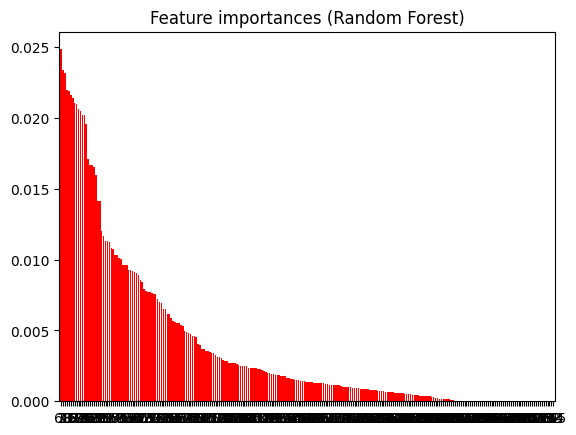

In [12]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()